# Plot sensitivity analysis
## Upper Olivares catchment - january, 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/Olivares

#### import packages

In [1]:
import subprocess
import os
import time
import numpy as np
import pandas as pd
import openpyxl
import datetime
import hydroeval as he
from configparser import ConfigParser
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
# Reading kge & nash
kge = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\kge.xlsx").iloc[1:,:]
kge.columns = ["KGE"]
corr = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\correlation.xlsx").iloc[1:,:]
corr.columns = ["Correlation"]
var = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\variability.xlsx").iloc[1:,:]
var.columns = ["Coefficient of variation"]
bias = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\bias.xlsx").iloc[1:,:]
bias.columns = ["Bias"]
nash = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\nash.xlsx").iloc[1:,:]
nash.columns = ["Nash"]

In [25]:
kge

,KGE
0.5_RootDepthFlat,0.278975
1.5_RootDepthFlat,0.278975
0.5_SubDepthFlat,0.278975
1.5_SubDepthFlat,0.278975
0.5_CapRiseMax,0.278975
1.5_CapRiseMax,0.278975
0.5_GwDepth,0.278975
1.5_GwDepth,0.278975
0.5_GwSat,0.278975
1.5_GwSat,0.278975


In [5]:
#Set index
index = [] 
#param_names = ["RootDepthFlat","SubDepthFlat","CapRiseMax","GwDepth","GwSat","deltaGw","BaseThresh",
#               "alphaGw","YieldGw","DDFG","DDFDG","GlacF","Tcrit","SnowSC","DDFS","kx"]

param_names = ["RootDepthFlat","SubDepthFlat","CapRiseMax","GwDepth","GwSat","deltaGw",
              "BaseThresh","alphaGw","YieldGw","DDFG","DDFDG","Debris_factor","GlacF",
              "Tcrit","SnowSC","DDFS","r","Swfactor","kx"]

for i in param_names:
#    if i == param_names[0]:
#        index.append("base")
    index.append("0.5_"+i)
    index.append("1.5_"+i)
    
index

kge.index = index
corr.index = index
var.index = index
bias.index = index
nash.index = index

In [6]:
#Normalizing data
performance = [kge,corr,var,bias,nash]

kge2 = []
corr2 = []
var2 = []
bias2 = []
nash2 = []

performance2 = [kge2,corr2,var2,bias2,nash2]

for i in range(len(performance)):
    for v in range(len(performance[i])):
         performance2[i].append((performance[i].iloc[v,0] - performance[i].mean()[0])/performance[i].std()[0])

kge2 = pd.DataFrame(kge2)
corr2 = pd.DataFrame(corr2)
var2 = pd.DataFrame(var2)
bias2 = pd.DataFrame(bias2)
nash2 = pd.DataFrame(nash2)

kge2.index = index
corr2.index = index
var2.index = index
bias2.index = index
nash2.index = index

kge2.columns = ["KGE"]
corr2.columns = ["Correlation"]
var2.columns = ["Coefficient of variation"]
bias2.columns = ["Bias"]
nash2.columns = ["Nash"]

### Original results

#### KGE

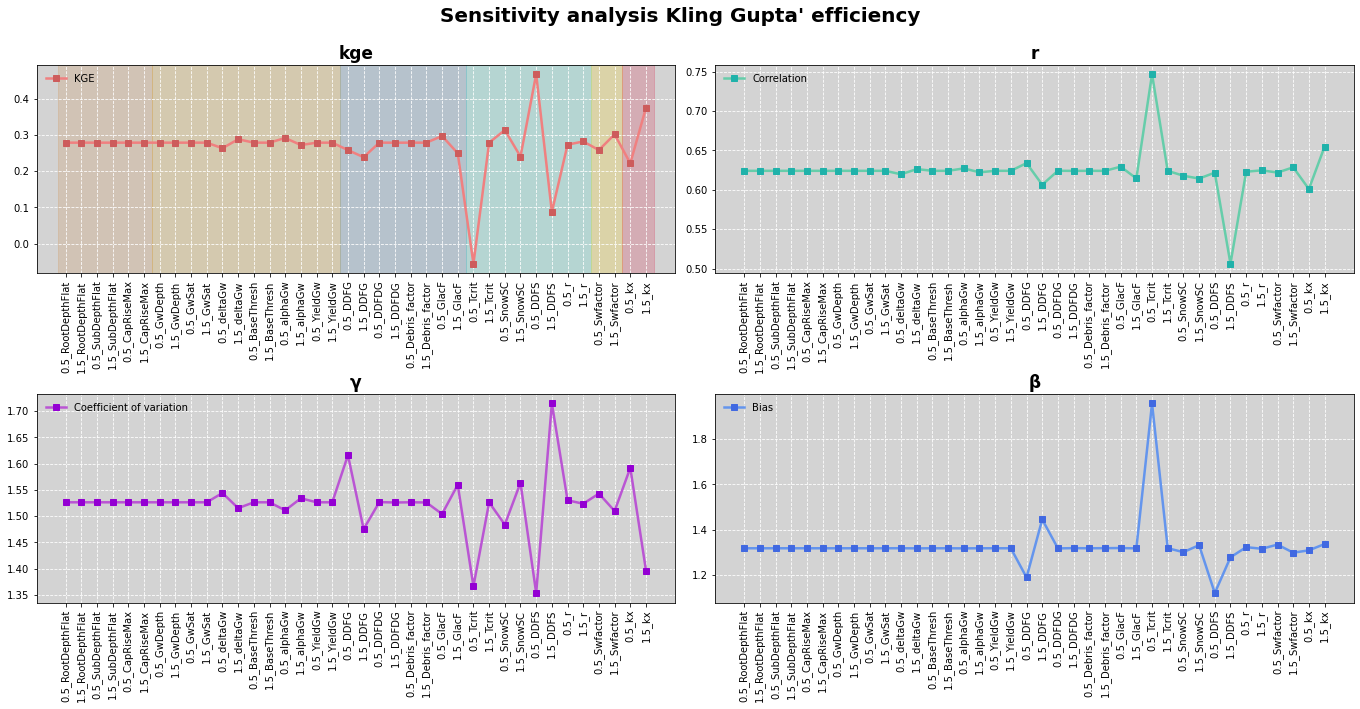

In [36]:
#KGE
#Define subplots dimensions
fig = plt.figure(figsize=(19,10))

#Specific settings
ax0 = fig.add_subplot(221)
kge.plot(ax=ax0, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")
#ax0.scatter(index,kge.iloc[:,0])
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax0.set_xticks(np.arange(len(kge)))
ax0.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("kge",fontweight="bold",fontsize=17)


left1, bottom1, width1, height1 = (-0.5, -5, 6, 10)
left2, bottom2, width2, height2 = (5.5, -5, 12, 10)
left3, bottom3, width3, height3 = (17.5, -5, 8, 10)
left4, bottom4, width4, height4 = (25.5, -5, 8, 10)
left5, bottom5, width5, height5 = (33.5, -5, 2, 10)
left6, bottom6, width6, height6 = (35.5, -5, 2, 10)
rect1=mpatches.Rectangle((left1,bottom1),width1,height1, fill=True, color="peru",alpha=0.2,label="soil")
rect2=mpatches.Rectangle((left2,bottom2),width2,height2, fill=True, color="goldenrod",alpha=0.2,label="groundwater")
rect3=mpatches.Rectangle((left3,bottom3),width3,height3, fill=True, color="steelblue",alpha=0.2,label="glacier")
rect4=mpatches.Rectangle((left4,bottom4),width4,height4, fill=True, color="turquoise",alpha=0.2,label="snow")
rect5=mpatches.Rectangle((left5,bottom5),width5,height5, fill=True, color="gold",alpha=0.2,label="climate")
rect6=mpatches.Rectangle((left6,bottom6),width6,height6, fill=True, color="crimson",alpha=0.2,label="routing")
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
plt.gca().add_patch(rect5)
plt.gca().add_patch(rect6)

#plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=5,handles=[rect1,rect2,rect3,rect4,rect5],frameon=False)



ax1 = fig.add_subplot(222)
corr.plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax1.set_xticks(np.arange(len(kge)))
ax1.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("r",fontweight="bold",fontsize=17)

ax2 = fig.add_subplot(223)
var.plot(ax=ax2, color="mediumorchid", linewidth=2.5, marker="s",markersize=6, markeredgecolor="darkviolet",markerfacecolor="darkviolet")
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax2.set_xticks(np.arange(len(kge)))
ax2.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("γ",fontweight="bold",fontsize=17)

ax3 = fig.add_subplot(224)
bias.plot(ax=ax3, color="cornflowerblue",linewidth=2.5, marker="s",markersize=6, markeredgecolor="royalblue",markerfacecolor="royalblue")
ax3.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax3.set_xticks(np.arange(len(kge)))
ax3.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("β",fontweight="bold",fontsize=17)
#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Sensitivity analysis Kling Gupta' efficiency",fontweight="bold",fontsize=20)
fig.set_facecolor("white")
plt.show()


fig.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\KGE.png", dpi=500)

#### NASH

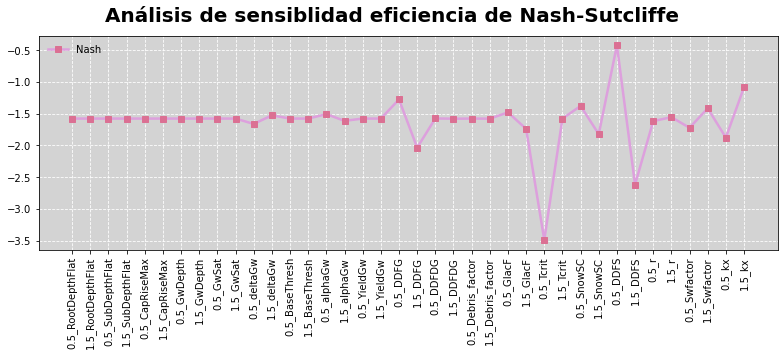

In [7]:
#NASH - EDITTTT IN NEW ITERATION
#Define subplots dimensions
fig2 = plt.figure(figsize=(11,5))

#Specific settings
ax4 = fig2.add_subplot(111)
nash.plot(ax=ax4, color="plum", linewidth=2.5, marker="s",markersize=6, markeredgecolor="palevioletred",markerfacecolor="palevioletred")
ax4.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax4.set_xticks(np.arange(len(kge)))
ax4.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)

#General settings
plt.tight_layout()
fig2.subplots_adjust(top=0.9)
fig2.suptitle("Análisis de sensiblidad eficiencia de Nash-Sutcliffe",fontweight="bold",fontsize=20)
fig2.set_facecolor("white")
plt.show()


fig2.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\NASH.png", dpi=500)

### Normalized data

#### KGE_normalized

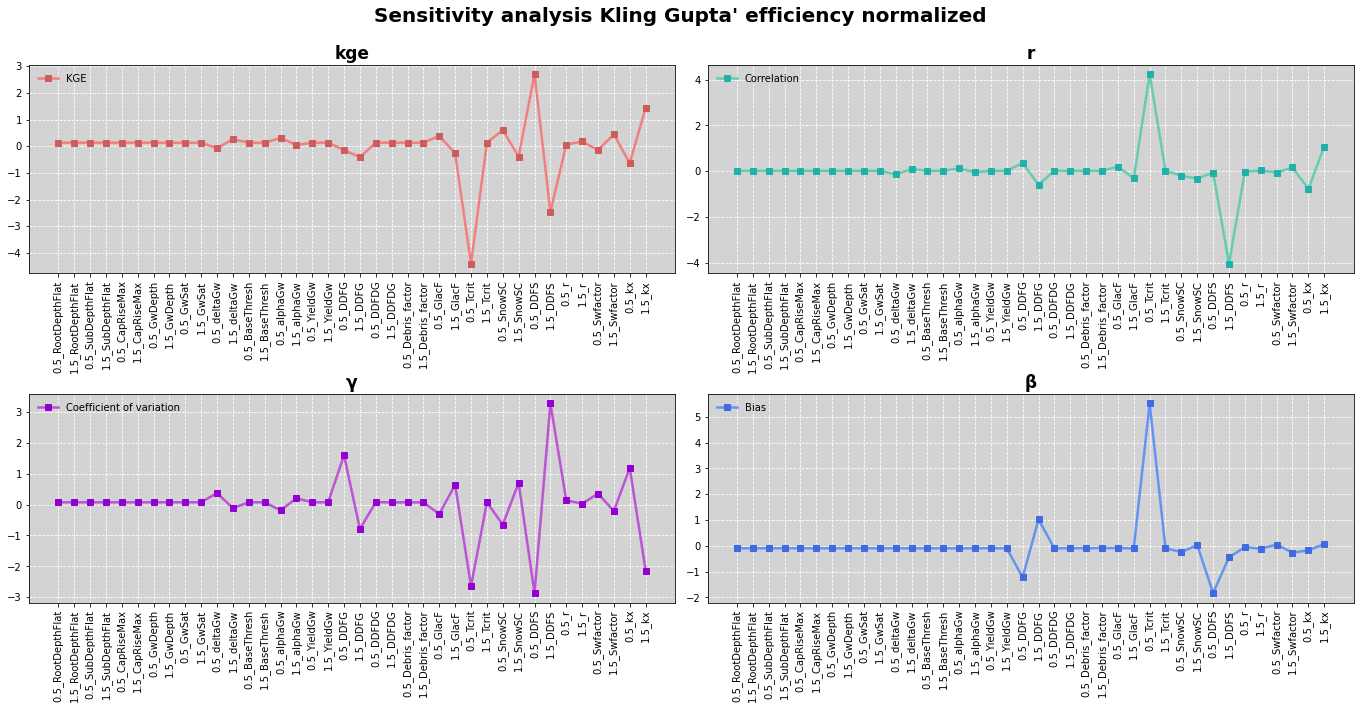

In [38]:
#KGE
#Define subplots dimensions
fig = plt.figure(figsize=(19,10))

#Specific settings
ax0 = fig.add_subplot(221)
kge2.plot(ax=ax0, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")
#ax0.scatter(index,kge.iloc[:,0])
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax0.set_xticks(np.arange(len(kge)))
ax0.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("kge",fontweight="bold",fontsize=17)

ax1 = fig.add_subplot(222)
corr2.plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax1.set_xticks(np.arange(len(kge)))
ax1.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("r",fontweight="bold",fontsize=17)

ax2 = fig.add_subplot(223)
var2.plot(ax=ax2, color="mediumorchid", linewidth=2.5, marker="s",markersize=6, markeredgecolor="darkviolet",markerfacecolor="darkviolet")
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax2.set_xticks(np.arange(len(kge)))
ax2.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("γ",fontweight="bold",fontsize=17)

ax3 = fig.add_subplot(224)
bias2.plot(ax=ax3, color="cornflowerblue",linewidth=2.5, marker="s",markersize=6, markeredgecolor="royalblue",markerfacecolor="royalblue")
ax3.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax3.set_xticks(np.arange(len(kge)))
ax3.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("β",fontweight="bold",fontsize=17)
#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Sensitivity analysis Kling Gupta' efficiency normalized",fontweight="bold",fontsize=20)
fig.set_facecolor("white")
plt.show()

#### NASH

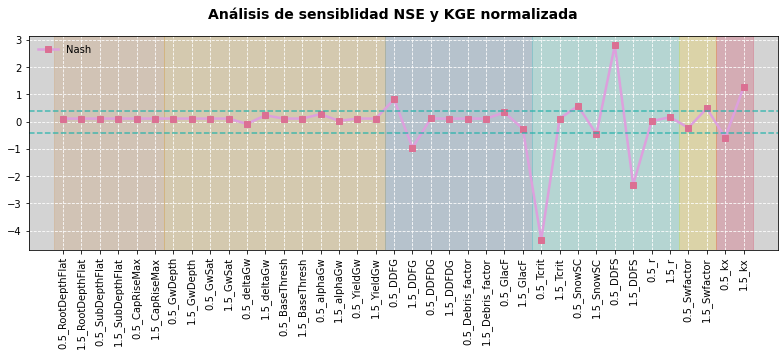

In [11]:
#NASH - EDITTTT IN NEW ITERATION
#Define subplots dimensions
fig2 = plt.figure(figsize=(11,5))

#Specific settings
ax4 = fig2.add_subplot(111)
nash2.plot(ax=ax4, color="plum", linewidth=2.5, marker="s",markersize=6, markeredgecolor="palevioletred",markerfacecolor="palevioletred")
ax4.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax4.set_xticks(np.arange(len(kge)))
ax4.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.axhline(y = 0.4, color = "lightseagreen", linestyle = '--',alpha=0.8)
plt.axhline(y = -0.4, color = "lightseagreen", linestyle = '--',alpha=0.8)

left1, bottom1, width1, height1 = (-0.5, -5, 6, 10)
left2, bottom2, width2, height2 = (5.5, -5, 12, 10)
left3, bottom3, width3, height3 = (17.5, -5, 8, 10)
left4, bottom4, width4, height4 = (25.5, -5, 8, 10)
left5, bottom5, width5, height5 = (33.5, -5, 2, 10)
left6, bottom6, width6, height6 = (35.5, -5, 2, 10)
rect1=mpatches.Rectangle((left1,bottom1),width1,height1, fill=True, color="peru",alpha=0.2,label="soil")
rect2=mpatches.Rectangle((left2,bottom2),width2,height2, fill=True, color="goldenrod",alpha=0.2,label="groundwater")
rect3=mpatches.Rectangle((left3,bottom3),width3,height3, fill=True, color="steelblue",alpha=0.2,label="glacier")
rect4=mpatches.Rectangle((left4,bottom4),width4,height4, fill=True, color="turquoise",alpha=0.2,label="snow")
rect5=mpatches.Rectangle((left5,bottom5),width5,height5, fill=True, color="gold",alpha=0.2,label="climate")
rect6=mpatches.Rectangle((left6,bottom6),width6,height6, fill=True, color="crimson",alpha=0.2,label="routing")
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
plt.gca().add_patch(rect5)
plt.gca().add_patch(rect6)

#General settings
plt.tight_layout()
fig2.subplots_adjust(top=0.9)
fig2.suptitle("Análisis de sensiblidad NSE y KGE normalizada",fontweight="bold",fontsize=14)
fig2.set_facecolor("white")
plt.show()

fig2.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\NASH_norm.png", dpi=500)

#### KGE

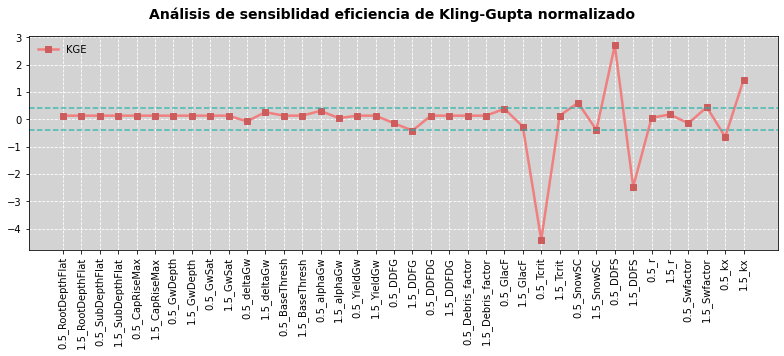

In [9]:
#JUST KGE - EDITTTT IN NEW ITERATION
#Define subplots dimensions
fig3 = plt.figure(figsize=(11,5))

#Specific settings
ax5 = fig3.add_subplot(111)
kge2.plot(ax=ax5, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")
ax5.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax5.set_xticks(np.arange(len(kge)))
ax5.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)

#General settings
plt.tight_layout()
fig3.subplots_adjust(top=0.9)
fig3.suptitle("Análisis de sensiblidad eficiencia de Kling-Gupta normalizado",fontweight="bold",fontsize=14)
fig3.set_facecolor("white")
plt.axhline(y = 0.4, color = "lightseagreen", linestyle = '--',alpha=0.8)
plt.axhline(y = -0.4, color = "lightseagreen", linestyle = '--',alpha=0.8)
plt.show()


fig3.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\KGE_norm.png", dpi=500)

In [68]:
for i in range(kge2.shape[0]):
    if kge2.iloc[i,0] >= 0.4 or kge2.iloc[i,0] <= -0.4:
        print(kge2.index[i])

1.5_DDFG
0.5_Tcrit
0.5_SnowSC
0.5_DDFS
1.5_DDFS
1.5_Swfactor
0.5_kx
1.5_kx


In [69]:
for i in range(nash2.shape[0]):
    if nash2.iloc[i,0] >= 0.4 or nash2.iloc[i,0] <= -0.4:
        print(nash2.index[i])

0.5_DDFG
1.5_DDFG
0.5_Tcrit
0.5_SnowSC
1.5_SnowSC
0.5_DDFS
1.5_DDFS
1.5_Swfactor
0.5_kx
1.5_kx
